# Diagramma di Hubble e modello cosmologico standard

In questo progetto viene analizzato il modello cosmologico standar "Lambda-cold-dark-matter", esso fornisce una dettagliata descrizione dello stato attuale dell'Universo e dei processi evolutivi che l'hanno determinato. Il modello è in accordo con i dati osservati e conferma l'ipotesi che esso sia in espansione. 
I dati sperimentali sono il redshift e il modulo di distanza. il primo è lo spostamento della lunghezza d'onda della luce emessa dall'oggetto astronomico osservato a causa dell'espansione dell'universo; il secondo è definito dalla differenza tra la magnitudine assoluta M e apparente m.

[riportare formule luminosità etc...]

Secondo la legge di Hubble, per piccole distanze esiste una relazione lineare tra il redshift e la distanza tra punto di osservazione e l'oggetto osservato. H0 è la costante di Hubble, ed essa rappresenta come scala la velocità di espansione dell'universo al variare della distanza degli oggetti astronomici osservati. 

[riportare formula con costante di hubble]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc  
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('dati.csv')

In [3]:
df

,nome_SN,redshift,mod_dist,mod_dist_err,unknown,Unnamed: 5
0,1993ah,0.028488,35.346583,0.223906,0.128419,NaN
1,1993ag,0.050043,36.682368,0.166829,0.128419,NaN
2,1993o,0.052926,36.817691,0.155756,0.128419,NaN
3,1993b,0.070086,37.446737,0.158467,0.128419,NaN
4,1992bs,0.062668,37.483409,0.156099,0.128419,NaN
...,...,...,...,...,...,...
575,D-000,1.017000,44.293971,0.171046,0.000015,NaN
576,D-006,1.315000,44.971358,0.187509,0.551672,NaN
577,P-009,0.821000,43.640939,0.194014,0.551672,NaN
578,R-012,1.215000,45.246521,0.560317,0.000148,NaN


In [4]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=1000)
ax.errorbar(df.redshift, df.mod_dist, xerr = 0, yerr=df.mod_dist_err, marker='o', markersize=4, linestyle='')
ax.set_xlabel('redshift')
ax.set_ylabel('mod_dist')
plt.show()

CURVE FIT 25 + 5 LOG(dl(z))

In [5]:
# attraverso la funzione ipergeometrica di seconda specie trovo il valore della luminosità DL(z):
# B è il parametro da stimare ovvero omegaM. z è il redshift.
def geom_1(B):
    return sc.hyp2f1(1/6,1/2,7/6, (B - 1)/B)
def geom_2(B,z):
    return sc.hyp2f1(1/6,1/2,7/6, ((B - 1)/B) * (1 + z) ** (-3))


In [6]:
# velocità della luce in km/s:
c = 299792.458
#Luminosità Dl(z):
def Dl(z,A,B):
     return ((c/A) * (2 * (1 + z))/np.sqrt(B)) * (geom_1(B) - 1/np.sqrt(1 + z) * geom_2(B,z))

In [7]:
# definisco la funzione i cui parametri verranno minimizzati attraverso il metodo dei minimi quadrati:

In [8]:
def model(z, A, B):
    return 25 + 5 * np.log10(Dl(z,A,B))

In [9]:
xdata = pd.Series(df.redshift).values
ydata = pd.Series(df.mod_dist).values
sigmas = pd.Series(df.mod_dist_err).values

In [10]:
model2 = np.vectorize(model)

In [11]:
popt, pcov = curve_fit(model2, xdata, ydata, p0=[10,0.5], sigma=sigmas, absolute_sigma=True)
print('curve fit')
print(popt)
print(pcov)         
print("A = {:.3f}+/-{:.3f}".format(popt[0],np.sqrt(pcov[0,0])))
print("B = {:.3f}+/-{:.3f}".format(popt[1],np.sqrt(pcov[1,1])))
fig, ax = plt.subplots(figsize=(10, 10), dpi=1000)
ax.errorbar(df.redshift, df.mod_dist, xerr = 0, yerr=df.mod_dist_err, marker='o', markersize=4, linestyle='')
ax.set_xlabel('redshift')
ax.set_ylabel('mod_dist')
plt.plot(xdata, model2(xdata, *popt), 'r-', label='fit: A={:5.3f}, B={:5.3f}'.format(*popt),color = 'black')
plt.legend()
plt.show()

curve fit
[70.00241711  0.2776121 ]
[[ 0.11675924 -0.00490031]
 [-0.00490031  0.00037945]]
A = 70.002+/-0.342
B = 0.278+/-0.019


In [12]:
C = 1 - 0.278
print("C = ",C , "+- 0.019")

C =  0.722 +- 0.019


Grafico dei residui

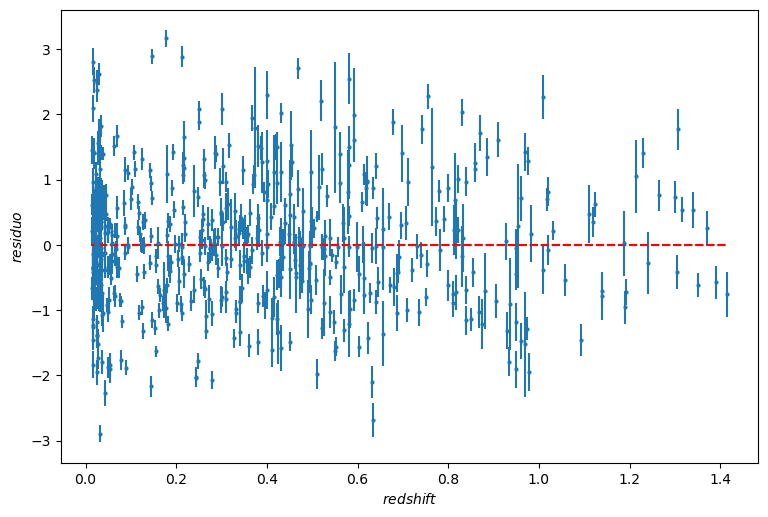

In [25]:
plt.figure(figsize=(9,6), dpi=100)
ax1=plt.subplot()
ax1.errorbar(df.redshift, ((df.mod_dist - model2(df.redshift, 70.002, 0.278))/df.mod_dist_err), xerr = 0, yerr=df.mod_dist_err, fmt="o", markersize=2)
ax1.plot(df.redshift, np.zeros(580), color = 'r', linestyle = '--' )
ax1.set_xlabel(r'$redshift$ ')
ax1.set_ylabel('$residuo$')
plt.show()

Calcolo del Chi quadro

In [27]:
for i in range(580):
    a = 0
    a += ((df.mod_dist - model2(i, 70.002, 0.278))/df.mod_dist_err)**2
    i += 1
    
chi = a / (580 - 1)
print(chi)

ValueError: Integers to negative integer powers are not allowed.